<a href="https://colab.research.google.com/github/SCK22/ModelBuilding/blob/master/TPU_MNIST_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making Networks Compete

## Achieving more realistic results

In [0]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def normalize(X):
    X = X.reshape(len(X), 784)
    X = X.astype('float32')/255
    return X

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = normalize(X_train)

In [0]:
input_dim = 100
np.random.seed(42)
optimizer = Adam(lr=0.0002, beta_1=0.5)

gen = Sequential()
gen.add(Dense(256, input_dim=input_dim))
gen.add(LeakyReLU(alpha=0.2))
gen.add(BatchNormalization())
gen.add(Dense(512))
gen.add(LeakyReLU(alpha=0.2))
gen.add(BatchNormalization())
gen.add(Dense(1024))
gen.add(LeakyReLU(alpha=0.2))
gen.add(BatchNormalization())
gen.add(Dense(784, activation='sigmoid'))
gen.compile(loss='binary_crossentropy', 
            optimizer=optimizer)

In [15]:
gen.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_10 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              525312    
__________

In [0]:
dsc = Sequential()
dsc.add(Dense(1024, input_dim=784))
dsc.add(LeakyReLU(alpha=0.2))
dsc.add(Dropout(0.3))
dsc.add(Dense(512))
dsc.add(LeakyReLU(alpha=0.2))
dsc.add(Dropout(0.3))
dsc.add(Dense(256))
dsc.add(LeakyReLU(alpha=0.2))
dsc.add(Dropout(0.3))
dsc.add(Dense(1, activation='sigmoid'))  
dsc.compile(loss='binary_crossentropy', 
            optimizer=optimizer)

In [17]:
dsc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
__________

In [0]:
def make_trainable(dnn, flag):
    dnn.trainable = flag
    for l in dnn.layers:
        l.trainable = flag
        
make_trainable(dsc, False)
inputs = Input(shape=(input_dim, ))
hidden = gen(inputs)
output = dsc(hidden)
gan = Model(inputs, output)
gan.compile(loss='binary_crossentropy',
            optimizer=optimizer)

In [19]:
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 784)               1493520   
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 1460225   
Total params: 2,953,745
Trainable params: 1,489,936
Non-trainable params: 1,463,809
_________________________________________________________________


In [0]:
def create_noise(n, z):
    return np.random.normal(0, 1, size=(n, z))

def plot_sample(n, z):
    samples = gen.predict(create_noise(n, z))
    plt.figure(figsize=(15,3))
    for i in range(n):
        plt.subplot(1, n, (i+1))
        plt.imshow(samples[i].reshape(28, 28), 
                   cmap='gray_r')
        plt.axis('off')
    plt.show()  

Time taken : 0:00:19.040918
Epoch 0


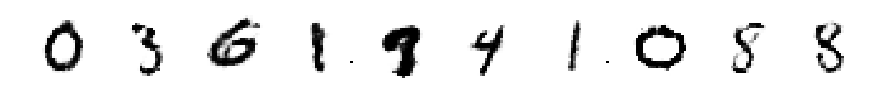

Time taken : 0:00:19.787086
Time taken : 0:00:18.958192
Time taken : 0:00:19.543915
Time taken : 0:00:19.680630
Time taken : 0:00:19.986386
Time taken : 0:00:18.952861
Time taken : 0:00:19.008631
Time taken : 0:00:18.929712
Time taken : 0:00:20.006752
Time taken : 0:00:18.965635
Epoch 10


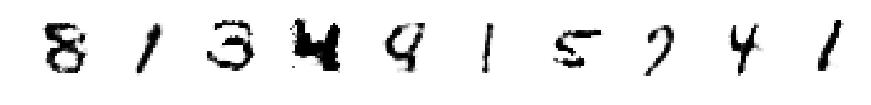

Time taken : 0:00:18.920312
Time taken : 0:00:18.977757
Time taken : 0:00:20.245193
Time taken : 0:00:19.056703
Time taken : 0:00:18.964030
Time taken : 0:00:18.888119
Time taken : 0:00:20.049307
Time taken : 0:00:18.973326
Time taken : 0:00:19.404461
Time taken : 0:00:19.887690
Epoch 20


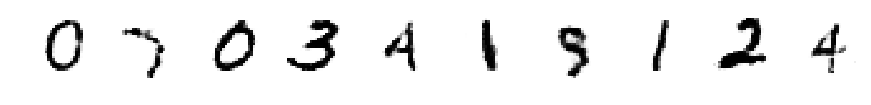

Time taken : 0:00:19.876819
Time taken : 0:00:19.164132
Time taken : 0:00:18.947997
Time taken : 0:00:18.881003
Time taken : 0:00:19.384928
Time taken : 0:00:19.627565
Time taken : 0:00:18.819264
Time taken : 0:00:18.919821
Time taken : 0:00:19.681652
Time taken : 0:00:19.983665
Epoch 30


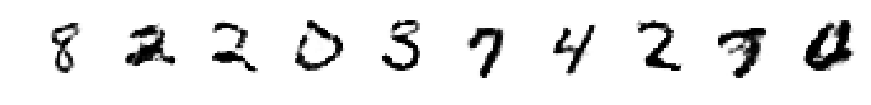

Time taken : 0:00:18.952073
Time taken : 0:00:18.899424
Time taken : 0:00:18.914381
Time taken : 0:00:20.095183
Time taken : 0:00:19.326037
Time taken : 0:00:19.874260
Time taken : 0:00:18.907978
Time taken : 0:00:20.018620
Time taken : 0:00:18.925528
Time taken : 0:00:18.720037
Epoch 40


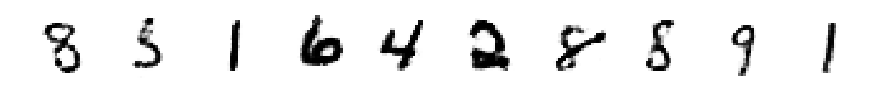

Time taken : 0:00:18.857934
Time taken : 0:00:20.073528
Time taken : 0:00:18.966641
Time taken : 0:00:19.261774
Time taken : 0:00:19.192088
Time taken : 0:00:19.905275
Time taken : 0:00:19.076673
Time taken : 0:00:18.947942
Time taken : 0:00:18.965940
Time taken : 0:00:19.491927
Epoch 50


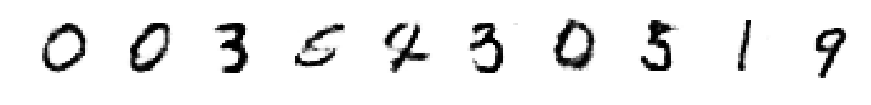

Time taken : 0:00:19.738870
Time taken : 0:00:19.999253
Time taken : 0:00:18.934218
Time taken : 0:00:19.117790
Time taken : 0:00:19.759083
Time taken : 0:00:18.916778
Time taken : 0:00:18.917099
Time taken : 0:00:18.904973
Time taken : 0:00:20.072806
Time taken : 0:00:19.644081
Epoch 60


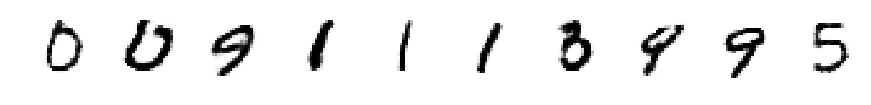

Time taken : 0:00:18.820710
Time taken : 0:00:18.997623
Time taken : 0:00:20.122087
Time taken : 0:00:18.924757
Time taken : 0:00:19.026974
Time taken : 0:00:18.953643
Time taken : 0:00:20.239129
Time taken : 0:00:20.045458
Time taken : 0:00:18.927801
Time taken : 0:00:18.974846
Epoch 70


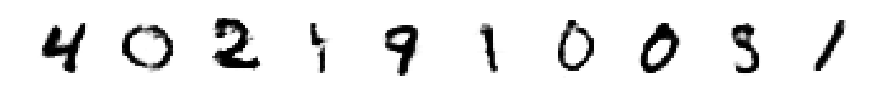

Time taken : 0:00:20.058041
Time taken : 0:00:18.970511
Time taken : 0:00:18.950246
Time taken : 0:00:19.017840
Time taken : 0:00:19.893407
Time taken : 0:00:19.880093
Time taken : 0:00:18.913270
Time taken : 0:00:18.955943
Time taken : 0:00:19.433493
Time taken : 0:00:19.601300
Epoch 80


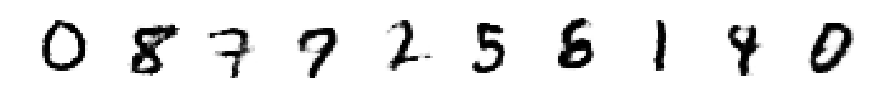

Time taken : 0:00:18.970579
Time taken : 0:00:18.952766
Time taken : 0:00:19.009037
Time taken : 0:00:20.226224
Time taken : 0:00:18.992598
Time taken : 0:00:18.900082
Time taken : 0:00:18.924835
Time taken : 0:00:20.163695
Time taken : 0:00:18.842237
Time taken : 0:00:18.892859
Epoch 90


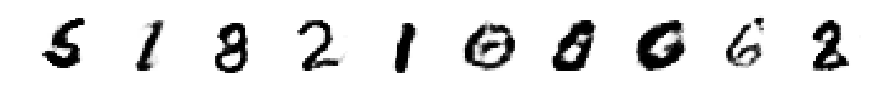

Time taken : 0:00:18.924807
Time taken : 0:00:20.374458
Time taken : 0:00:18.882498
Time taken : 0:00:18.994829
Time taken : 0:00:18.996040
Time taken : 0:00:20.048888
Time taken : 0:00:18.997724
Time taken : 0:00:18.908290
Time taken : 0:00:18.951724


In [23]:
from datetime import datetime
epochs = 100
batch_size = 128
batch_no = int(len(X_train) / batch_size)
gen_errors, dsc_errors = (list(), list())


for i in range(0, epochs):
    start = datetime.now()
    for j in range(batch_no): 
        # Drawing a random sample of the training set
        rand_sample = np.random.randint(0, len(X_train), size=batch_size)
        image_batch = X_train[rand_sample]
        
        # Creating noisy inputs for the generator
        input_noise = create_noise(batch_size, input_dim)

        # Generating fake images from the noisy input
        generated_images = gen.predict(input_noise)
        X = np.concatenate((image_batch, generated_images))
        
        # Creating somehow noisy labels
        y = np.concatenate([[0.9]*batch_size, [0.0]*batch_size])

        # Training discriminator to distinguish fakes from real ones
        make_trainable(dsc, True)
        dsc_loss = dsc.train_on_batch(X, y)
        make_trainable(dsc, False)

        # Trainining generating fakes
        input_noise = create_noise(batch_size, input_dim)
        fakes = np.ones(batch_size)
        for _ in range(4):
          gen_loss = gan.train_on_batch(input_noise, fakes)

    # Recording the losses
    gen_errors.append(gen_loss)
    dsc_errors.append(dsc_loss)
    print("Time taken : {}".format(str(datetime.now()-start)))
    # Showing intermediate results
    if i % 10 == 0:
      print("Epoch %i" % i)
      plot_sample(10, input_dim)

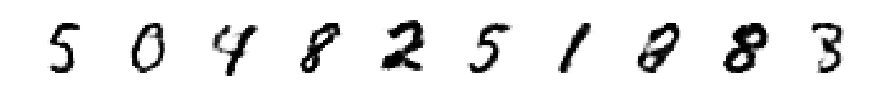

In [24]:
# Plotting the final result
plot_sample(10, input_dim)

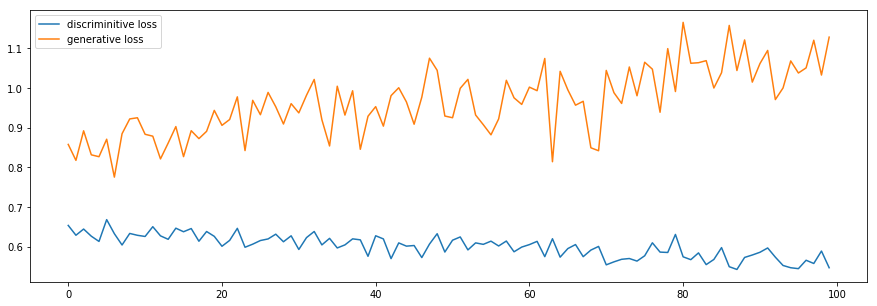

In [25]:
# Plotting the errors
plt.figure(figsize=(15, 5))
plt.plot(dsc_errors, label='discriminitive loss')
plt.plot(gen_errors, label='generative loss')
plt.legend()
plt.show()